# Linear Models

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

sns.set_style('darkgrid')

## Normal Equation 

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

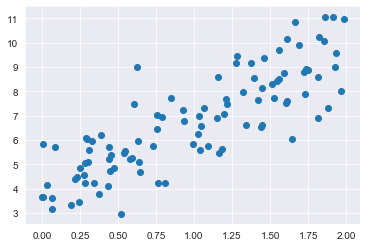

In [4]:
plt.scatter(X, y)
plt.show()

In [5]:
# Calculating theta
X_b = np.c_[np.ones((100, 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta

array([[3.94480619],
       [2.83861223]])

In [7]:
# Making prediction 
X_pred = np.array([[0], [2]])
X_new = np.c_[np.ones((2, 1)), X_pred]
y_preds = X_new.dot(theta)
y_preds

array([[3.94480619],
       [9.62203066]])

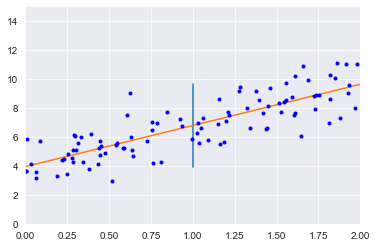

In [8]:
plt.plot(X_new, y_preds, )
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
# USing sklearn module

lin_reg = LinearRegression().fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.94480619]), array([[2.83861223]]))

## Gradient Descent

### Implementing Batch Gradient descent 

run 0: gradient => [[-11.43205327 -13.17810893]]
run 100: gradient => [[-6.55192234 -7.44011863]]
run 200: gradient => [[-3.77717097 -4.18134591]]
run 300: gradient => [[-2.19876272 -2.33121976]]
run 400: gradient => [[-1.30017864 -1.28144051]]
run 500: gradient => [[-0.78792932 -0.6863723 ]]
run 600: gradient => [[-0.4952514  -0.34962548]]
run 700: gradient => [[-0.32738771 -0.15961244]]
run 800: gradient => [[-0.23049519 -0.05293028]]
run 900: gradient => [[-0.17397839  0.00644524]]
[[3.6289178 ]
 [3.08824367]]


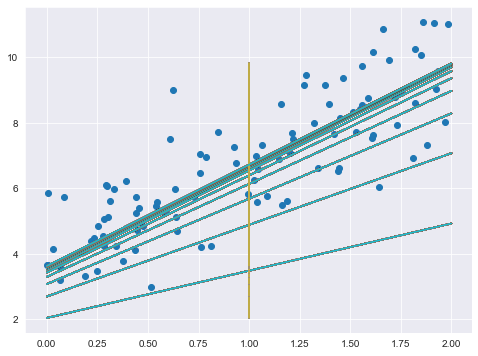

In [86]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.rand(2,1)
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
for runs in range(n_iterations):
    if runs % 100 == 0:
        gradient = 2/m *X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - (eta * gradient)
        print(f'run {runs}: gradient => {gradient.reshape(1, -1)}')
    
    y_new = X_new.dot(theta)
    plt.plot(X_new, y_new)
print(f'{theta}')

### Implementing Stochastic Gradient Descent